## Resuelve los siguientes ejercicios en este archivo.

In [12]:
#Santiago Castro
#José Ramón Rentero

**_Ejercicio 1_**. En esta primera práctica has de implementar un algoritmo de integración numérica basado
en el método de Monte Carlo.
Dada una función real e integrable de una sola variable f(x), y su integral F(x), la integral
definida de f(x) entre a y b viene dada por la expresión

<img src="Integral.jpg">

Como el cálculo simbólico de la integral F(x) puede ser muy difícil, se utilizan métodos numéricos
que aproximan su valor utilizando la interpretación geométrica de la integral definida que se
corresponde con el área bajo la curva f(x) entre a y b.
Dada una función f(x) positiva en el intervalo x 2 [a; b] cuyo valor máximo es M dentro de
ese intervalo, podemos definir un rectángulo de área (b - a) x M como el que se muestra en la
figura para el intervalo [0; 2]. El método de Monte Carlo para el cálculo de la integral consiste
en generar aleatoriamente puntos (en rojo en la figura) dentro de ese rectángulo y aproximar el
valor de la integral por el porcentaje de puntos que caen por debajo de la función en cuestión:

<img src="Integral2.jpg">

donde Ndebajo es el número de puntos (x; y) generados aleatoriamente cuya coordenada y es
menor que el valor de la función f(x) para ese valor de x y Ntotal es el número total de puntos
generados aleatoriamente dentro del rectángulo.

Implementa en Python una función con la siguiente cabecera

def integra_mc(fun, a, b, num_puntos=10000)

Que calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando
para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido,
comparándolo con el de aplicar la función scip.integrate.quad de Python.
No es necesario que tu implementación resuelva el problema de forma general, es suficiente
con que calcule el resultado para una función definida por ti que sea >= 0 en el intervalo [a; b] y
que se pueda aplicar tanto a un número como a un array de numpy. Por ejemplo -x^(2)+ 4x en el intervalo [0; 4]

<img src="Integral3.jpg">

Punto máximo:  148003
Resultado de Monte-Carlo: 17835841.53
Resultado usando scipy.integrate.quad: 18935670.000000007, con error: 2.1030485032203014e-07


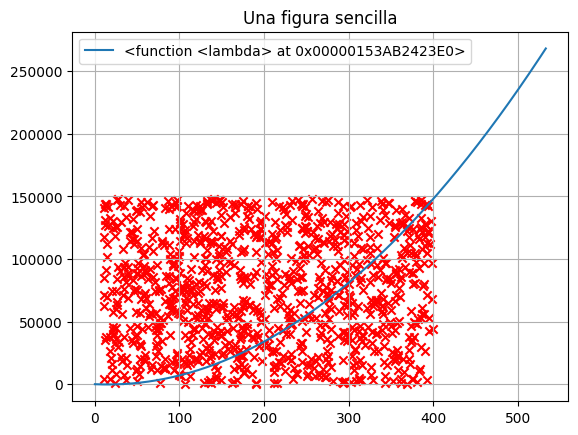

In [10]:
# %%writefile ejercicio1.py

# Escribe aquí la solución del ejercicio 1.
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

%matplotlib inline

fun = lambda x:x**2 - 30*x + 3

num1, num2 = 10, 400

x = np.arange(num2*4/3)  # obtiene la lista [0,1...9]
y = [fun(v) for v in x] # los cuadrados

def integra_mc(fun, a, b, num_puntos=1000):
    resultado = 0
    M=0

    for aux in range(a,b+1,1): #range hace un intervalo cerrado por la derecha y abierto por la izquierda
        if(fun(aux)>M):
            M=fun(aux)
    
    print("Punto máximo: ", M)
        
    listax = np.random.uniform(a, b,num_puntos)
    listay = np.random.uniform(0, M,num_puntos)

    for num in range(0,num_puntos):
        if(fun(listax[num]) >= listay[num]):
            resultado = resultado + 1
    
    resultado = (resultado/num_puntos)*(b-a)*M

    return resultado, listax, listay

result = integra_mc(fun, num1, num2, 1000)
print(f"Resultado de Monte-Carlo: {result[0]}")

integral, error = sci.quad(fun, num1, num2)
print(f"Resultado usando scipy.integrate.quad: {integral}, con error: {error}")

# Plot the data
plt.plot(x, y, label=fun)

plt.scatter(result[1], result[2], color='red', marker='x')

plt.legend()

plt.grid(True)

# título 
plt.title("Una figura sencilla")

# mostrar el resultado
plt.show()




**Ejercicio 2:** Crea dos funciones en Python que calcule el mínimo común múltiplo de dos números y el máximo común divisor de dos números.

In [11]:
# %%writefile ejercicio2.py

# Escribe aquí la solución del ejercicio 2.
import numpy as np
import matplotlib.pyplot as plt

def MCD_Euclides(a,b):
    if b==0:
        return a
    else:
        return MCD_Euclides(b,a%b)    

def mcm(a,b):
    return a * b // MCD_Euclides(a, b)
    
num1, num2 = 67, 33
print("MCD: ", MCD_Euclides(num1,num2))
print("mcm: ", mcm(num1,num2))
    

MCD:  1
mcm:  2211


**Ejericico 3:** Crea usando POO la clase Figura y que hereden de ella la clase Cuadrilatero, Rectangulo, Rombo, Triangulo y Circulo. Usa la lógica para contruir las relaciones Es-Un de todas las clases. El código debe respetar las buenas prácticas de POO como por ejemplo encapsulacón, no repetir código innecesario, etc.

Las clases deben tener los siguientes métodos:
- Show() muestra la figura. Podeis optar por mostrarla usando alguna librería gráfica o simplemente por consola mostrando los valores de sus atributos.
- Area() devuelve el área de la figura.
- Equal(figura) devuelve True si dos figuras son iguales. Para que dós figuras sean iguales deben ser del mismo tipo, y además tener la misma forma (mismo área y dimensiones)
- OrderByArea(figura) devuelve dos figuras, la actual y la que se le pasa por parámetro, pero la primera será la que magor área tiene y la segunda la que menor área tiene. Utiiza la habilidad de Python para devolver más de una valor en una función.

In [12]:
# %%writefile ejercicio3.py
# Escribe aquí la solución del ejercicio 3.

import numpy as np
import matplotlib.pyplot as plt
import turtle as t

class Figura:
    def __init__(self, nombre):
        self.nombre = nombre

    def getNombre(self):
        return self.nombre

    def sameType(self, figura):
        if self.getNombre() == figura.getNombre():
            return True
        return False


class Cuadrilatero(Figura):
    def __init__(self, nombre, lado):
        super().__init__(nombre)
        self.lado = lado

    def getArea(self):
        return self.lado**2

    def Equals(self, figura):
        if super().sameType(figura):
            if self.lado == figura.lado and self.getArea() == figura.getArea():
                return True
        return False

    def OrderByArea(self, figura):
        if self.getArea() > figura.getArea():
            return self, figura
        else:
            return figura, self
        
    def Show(self):
        for i in range(4):
            t.forward(self.lado)
            t.left(90)
        
class Rectangulo(Figura):
    def __init__(self, nombre, base, altura):
        super().__init__(nombre)
        self.base = base
        self.altura = altura

    def getArea(self):
        return self.base * self.altura

    def Equals(self, figura):
        if super().sameType(figura):
            if (
                self.base == figura.base
                and self.altura == figura.altura
                and self.getArea() == figura.getArea()
            ):
                return True
        return False

    def OrderByArea(self, figura):        
        if self.getArea() > figura.getArea():
            return self, figura
        else:
            return figura, self
        
    
    def Show(self):
        for i in range(2):
            t.forward(self.base)
            t.left(90)
            t.forward(self.altura)
            t.left(90)


class Rombo(Figura):
    def __init__(self, nombre, diagonalMayor, diagonalMenor):
        super().__init__(nombre)
        self.diagonalMayor = diagonalMayor
        self.diagonalMenor = diagonalMenor

    def getArea(self):
        return self.diagonalMayor * self.diagonalMenor / 2

    def Equals(self, figura):
        if super().sameType(figura):
            if (
                self.diagonalMayor == figura.diagonalMayor
                and self.diagonalMenor == figura.diagonalMenor
                and self.getArea() == figura.getArea()
            ):
                return True
        return False

    def OrderByArea(self, figura):
        if self.getArea() > figura.getArea():
            return self, figura
        else:
            return figura, self
    
    def Show(self):
        for i in range(2):
            t.forward(np.sqrt((self.diagonalMayor/2)**2 + (self.diagonalMenor/2)**2 ))
            t.left(110)
            t.forward(np.sqrt((self.diagonalMayor/2)**2 + (self.diagonalMenor/2)**2 ))
            t.left(70)
        


class Triangulo(Figura):
    def __init__(self, nombre, base, altura):
        super().__init__(nombre)
        self.base = base
        self.altura = altura

    def getArea(self):
        return self.base * self.altura / 2

    def Equals(self, figura):
        if super().sameType(figura):
            if (
                self.base == figura.base
                and self.altura == figura.altura
                and self.getArea() == figura.getArea()
            ):
                return True
        return False

    def OrderByArea(self, figura):
        if self.getArea() > figura.getArea():
            return self, figura
        else:
            return figura, self
    
    def Show(self):
        for i in range(3):
            t.left(120)
            t.forward(self.base)
            

class Circulo(Figura):
    def __init__(self, nombre, radio):
        super().__init__(nombre)
        self.radio = radio

    def getArea(self):
        return np.pi * self.radio**2

    def Equals(self, figura):
        if super().sameType(figura):
            if self.radio == figura.radio and self.getArea() == figura.getArea():
                return True
        return False
    
    def OrderByArea(self, figura):
        if self.getArea() > figura.getArea():
            return self, figura
        else:
            return figura, self

    
    def Show(self):
        t.circle(self.radio)

# Crear instancias de las figuras
cuadrado = Cuadrilatero("Cuadrado", 40)
rectangulo = Rectangulo("Rectangulo", 40, 60)
rombo = Rombo("Rombo", 50, 30)
triangulo = Triangulo("Triangulo", 40, 60)
circulo = Circulo("Circulo", 30)

# Mostrar áreas
print(f"Área del {cuadrado.getNombre()}: {cuadrado.getArea()}")
print(f"Área del {rectangulo.getNombre()}: {rectangulo.getArea()}")
print(f"Área del {rombo.getNombre()}: {rombo.getArea()}")
print(f"Área del {triangulo.getNombre()}: {triangulo.getArea()}")
print(f"Área del {circulo.getNombre()}: {circulo.getArea()}")

# Comparar figuras
print(f"¿El cuadrado y el rectángulo son iguales? {cuadrado.Equals(rectangulo)}")
print(f"¿El triángulo y el rombo son iguales? {triangulo.Equals(rombo)}")

# Ordenar por área
print(f"Entre cuadrado y rectángulo")
figura_mayor, figura_menor = cuadrado.OrderByArea(rectangulo)

print(f"Figura con mayor área: {figura_mayor.getNombre()}, Área: {figura_mayor.getArea()}")
print(f"Figura con menor área: {figura_menor.getNombre()}, Área: {figura_menor.getArea()}")
# Dibujar figuras
figuras = cuadrado, rectangulo, rombo, triangulo, circulo
for figura in figuras:
    for i in range(2):
        t.home()
        t.heading()
        figura.Show()
        t.clear()
        
t.bye()


Área del Cuadrado: 1600
Área del Rectangulo: 2400
Área del Rombo: 750.0
Área del Triangulo: 1200.0
Área del Circulo: 2827.4333882308138
¿El cuadrado y el rectángulo son iguales? False
¿El triángulo y el rombo son iguales? False
Entre cuadrado y rectángulo
Figura con mayor área: Rectangulo, Área: 2400
Figura con menor área: Cuadrado, Área: 1600
